In [ ]:
#.Assuming a set of documents that need to be classified, use the naïve Bayesian 
#Classifier model to perform this task.


In [146]:
import numpy as np
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [147]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as esw

In [148]:
os.getcwd()

'D:\\MlData\\Sports'

In [149]:
dir = "D:\MlData\Auto"
os.chdir(dir)
Auto_docu = []

for file in os.listdir(dir):
    with open(file, "r", encoding="utf-8") as input:
        for string in input:
            Auto_docu.append(string)
        

In [150]:
len(Auto_docu)

3

In [151]:
Auto_docu[0]

'Mercedes Car Engine\n'

In [152]:
dir = "D:\MlData\Comp"
os.chdir(dir)
Comp_docu = []

for file in os.listdir(dir):
    with open(file, "r", encoding="utf-8") as input:
        for string in input:
            Comp_docu.append(string)
        

In [153]:
len(Comp_docu)


3

In [154]:
Comp_docu[0]

'Red Green Pixels in Hard disk\n'

In [155]:
dir = "D:\MlData\Sports"
os.chdir(dir)
Sports_docu = []

for file in os.listdir(dir):
    with open(file, "r", encoding="utf-8") as input:
        for string in input:
           Sports_docu.append(string)
        

In [156]:
len(Sports_docu)

3

In [157]:
Sports_docu[0]

'Lawn Tennis\n'

In [158]:
corpus = Auto_docu + Comp_docu + Sports_docu
label = 3* ["Auto"] + 3* ["Comp"] + 3* ["Sports"]

In [159]:
corpus_train , corpus_test, label_train, label_test = train_test_split(corpus, label, test_size=0.2)

In [160]:
vectorizer = CountVectorizer(tokenizer=str.split, stop_words=esw)
corpus_train_mat = vectorizer.fit_transform(corpus_train)
corpus_train_mat = corpus_train_mat.toarray()

corpus_test_mat = vectorizer.transform(corpus_test)
corpus_test_mat = corpus_test_mat.toarray()

In [161]:
def fit_NBclassifier(trainset, trainlabel):
    nbclassifier = MultinomialNB()
    nbclassifier.fit(trainset, trainlabel)
    
    return nbclassifier


In [162]:
NB_clf = fit_NBclassifier(corpus_train_mat, label_train)

label_predicted = NB_clf.predict(corpus_test_mat)
accuracy = accuracy_score(label_test, label_predicted)
accuracy

1.0

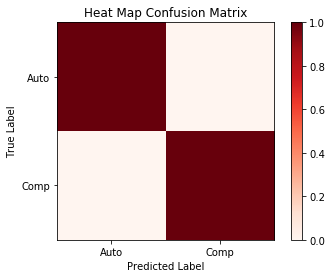

In [163]:
conf_mat = confusion_matrix(label_test, label_predicted)
labels = sorted(set(label_predicted))

plt.figure()
plt.title("Heat Map Confusion Matrix")
plt.imshow(conf_mat, interpolation="nearest", cmap=plt.cm.Reds)
plt.xticks(np.arange(len(labels)), labels)
plt.yticks(np.arange(len(labels)), labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.colorbar()
plt.show()